In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import seaborn as sns

df=pd.read_csv(r'C:\Users\imagoworks-moongzeee\test\end-part2_df.csv', index_col='date')
df_2016=df.filter(like='2016',axis=0)

df_2016.reset_index(inplace=True)
df_2016['month']=df_2016['date'].apply(lambda s: int(s.split('-')[1]))
df_2016

,date,meantempm,maxtempm,mintempm,meantempm_1,meantempm_2,meantempm_3,meandewptm_1,meandewptm_2,meandewptm_3,...,maxpressurem_1,maxpressurem_2,maxpressurem_3,minpressurem_1,minpressurem_2,minpressurem_3,precipm_1,precipm_2,precipm_3,month
0,2016-01-01,-2,3,-7,-8.0,-3.0,-4.0,-11.0,-7.0,-8.0,...,1032.0,1029.0,1025.0,1027.0,1023.0,1015.0,0.0,0.76,0.00,1
1,2016-01-02,-3,4,-10,-2.0,-8.0,-3.0,-8.0,-11.0,-7.0,...,1032.0,1032.0,1029.0,1027.0,1027.0,1023.0,0.0,0.00,0.76,1
2,2016-01-03,-4,1,-9,-3.0,-2.0,-8.0,-8.0,-8.0,-11.0,...,1027.0,1032.0,1032.0,1023.0,1027.0,1027.0,0.0,0.00,0.00,1
3,2016-01-04,-5,-2,-8,-4.0,-3.0,-2.0,-8.0,-8.0,-8.0,...,1034.0,1027.0,1032.0,1025.0,1023.0,1027.0,0.0,0.00,0.00,1
4,2016-01-05,-1,5,-6,-5.0,-4.0,-3.0,-8.0,-8.0,-8.0,...,1035.0,1034.0,1027.0,1028.0,1025.0,1023.0,0.0,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2016-12-27,1,9,-7,1.0,9.0,-3.0,-8.0,5.0,-4.0,...,1027.0,1019.0,1023.0,1008.0,997.0,1017.0,0.0,23.37,0.00,12
361,2016-12-28,4,9,-2,1.0,1.0,9.0,-5.0,-8.0,5.0,...,1027.0,1027.0,1019.0,1014.0,1008.0,997.0,0.0,0.00,23.37,12
362,2016-12-29,1,8,-7,4.0,1.0,1.0,-4.0,-5.0,-8.0,...,1022.0,1027.0,1027.0,1013.0,1014.0,1008.0,0.0,0.00,0.00,12
363,2016-12-30,1,9,-8,1.0,4.0,1.0,-9.0,-4.0,-5.0,...,1029.0,1022.0,1027.0,1023.0,1013.0,1014.0,0.0,0.00,0.00,12


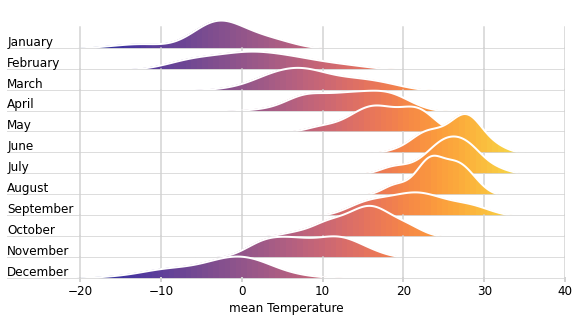

In [23]:
import calendar 
import cmocean  as cmo 

fig, axs=plt.subplots(nrows=12, figsize=(10,5), sharex=True, sharey=True)
fig.set_facecolor('none')

x=np.linspace(0,1,100)
for i, ax in enumerate(axs,1):
    sns.kdeplot(df_2016.query(f"month=={i}")['meantempm'], 
                fill=True, color='w',alpha=0, linewidth=2, legend=False, ax=ax)

    ax.set_xlim(-29,40)

    im = ax.imshow(np.vstack([x,x]),
        cmap='cmo.thermal',
        aspect='auto',
        extent=[*ax.get_xlim(),*ax.get_ylim()]
        )
    path=ax.collections[0].get_paths()[0]
    patch=mpl.patches.PathPatch(path,transform=ax.transData)
    im.set_clip_path(patch)


    ax.text(-29,0.01,calendar.month_name[i],fontdict={'fontsize':'large'})

    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    if i != 12:
        ax.tick_params(axis='x',length=0)
    else:
        ax.tick_params(axis='x', direction='inout', color='lightgrey', length=5, width=2, labelsize='large')
        ax.set_xlabel('mean Temperature', fontdict={'fontsize':'large'})

    ax.set_yticks([])
    ax.set_ylabel('')


    xticks=ax.get_xticks()
    for xtick in xticks:
        ax.plot([xtick,xtick],[0,0.065],color='lightgray',zorder=0)

    ax.axhline(0,color='lightgray')
    ax.set_facecolor('none')



fig.subplots_adjust(hspace=-0.5)



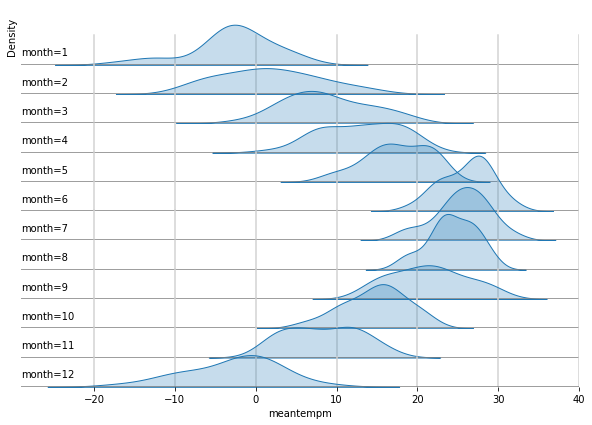

In [60]:
fig,axes=plt.subplots(nrows=12, figsize=(10,7), sharex=True, sharey=True)

for i,ax in enumerate(axes, 1):
    sns.kdeplot(df_2016.query(f"month=={i}")['meantempm'],shade=True, legend=False, ax=ax)
    ax.set_xlim(-29, 40)
    ax.text(-29,0.02, f"month={i}")

    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    if i!=12:
        ax.tick_params(axis='x',length=0)
    # else:
        # ax.tick_params(axis="x", labelsize="large")
        # ax.set_xlabel("Mean Temperature ($^o$C)", fontdict={"fontsize":"large"})

    ax.set_yticks([])
    # ax.grid(axis='x')
    xticks = ax.get_xticks()
    for xtick in xticks:
        ax.plot([xtick, xtick], [0, 0.065], color='lightgray', zorder=0)

    ax.axhline(0, color='gray')
    ax.patch.set_alpha(0)

fig.subplots_adjust(hspace=-0.5)
